In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

### Load Dataset

In [2]:
DF_PATH = "data/lifestyle_sustainability_data_standardized.csv"

In [3]:
df_raw = pd.read_csv(DF_PATH)
print(df_raw.shape)
print(df_raw.columns)
print(df_raw.dtypes)
df_raw.head()

(499, 13)
Index(['EnvironmentalAwareness', 'CommunityInvolvement',
       'MonthlyElectricityConsumption', 'MonthlyWaterConsumption',
       'PhysicalActivities', 'DietType_Balanced',
       'DietType_Mostly Animal-Based', 'DietType_Mostly Plant-Based',
       'TransportationMode_Bike', 'TransportationMode_Car',
       'TransportationMode_Public Transit', 'TransportationMode_Walk',
       'Rating'],
      dtype='object')
EnvironmentalAwareness               float64
CommunityInvolvement                 float64
MonthlyElectricityConsumption        float64
MonthlyWaterConsumption              float64
PhysicalActivities                   float64
DietType_Balanced                    float64
DietType_Mostly Animal-Based         float64
DietType_Mostly Plant-Based          float64
TransportationMode_Bike              float64
TransportationMode_Car               float64
TransportationMode_Public Transit    float64
TransportationMode_Walk              float64
Rating                             

,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,PhysicalActivities,DietType_Balanced,DietType_Mostly Animal-Based,DietType_Mostly Plant-Based,TransportationMode_Bike,TransportationMode_Car,TransportationMode_Public Transit,TransportationMode_Walk,Rating
0,1.445313,1.385178,-1.594895,-1.340155,1.347737,-0.680693,-0.636894,1.238142,1.786974,-0.624477,-0.571951,-0.553428,5
1,0.699490,-0.034132,-0.348649,-0.114045,-0.062160,1.469091,-0.636894,-0.807662,-0.559605,-0.624477,1.748402,-0.553428,4
2,-0.792157,-1.453442,0.897597,1.112064,-1.472057,-0.680693,1.570120,-0.807662,-0.559605,1.601339,-0.571951,-0.553428,1
3,0.699490,-0.034132,-1.179480,-0.931452,1.347737,-0.680693,-0.636894,1.238142,-0.559605,-0.624477,-0.571951,1.806919,5
4,-0.046334,-1.453442,0.066766,0.294658,-0.062160,1.469091,-0.636894,-0.807662,-0.559605,-0.624477,1.748402,-0.553428,3


In [4]:
df_raw.groupby("Rating").size()

Rating
1     97
2     34
3    101
4     91
5    176
dtype: int64

Text(0.5, 1.0, 'Target Variable Distribution')

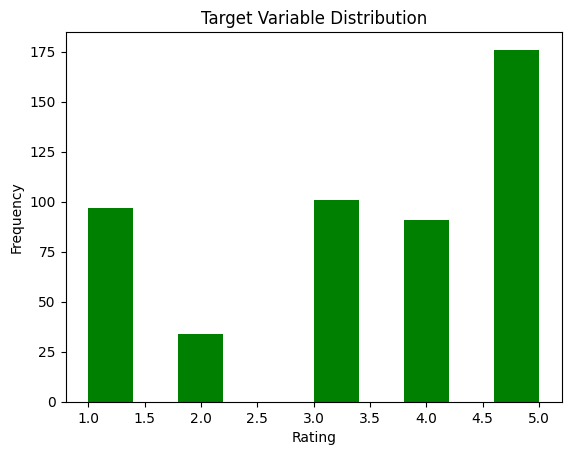

In [5]:
df_raw["Rating"].hist(color="Green", grid=False)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Target Variable Distribution")

In [6]:
df = df_raw.copy()
df.shape

(499, 13)

In [7]:
target_column = df.pop("Rating")
X = df.to_numpy()
Y = np.array(target_column.to_list())
X.shape, Y.shape

((499, 12), (499,))

### SMOTE

In [8]:
RANDOM_STATE = 42

In [9]:
smote = SMOTE(sampling_strategy="not majority", k_neighbors=5, random_state=RANDOM_STATE)
smote

SMOTE(random_state=42, sampling_strategy='not majority')

In [10]:
X_res, Y_res = smote.fit_resample(X, Y)
X_res.shape, Y_res.shape

((880, 12), (880,))

In [11]:
df_res = pd.DataFrame(data=X_res, columns=df_raw.columns[:-1])
df_res["Rating"] = Y_res
df_res

,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,PhysicalActivities,DietType_Balanced,DietType_Mostly Animal-Based,DietType_Mostly Plant-Based,TransportationMode_Bike,TransportationMode_Car,TransportationMode_Public Transit,TransportationMode_Walk,Rating
0,1.445313,1.385178,-1.594895,-1.340155,1.347737,-0.680693,-0.636894,1.238142,1.786974,-0.624477,-0.571951,-0.553428,5
1,0.699490,-0.034132,-0.348649,-0.114045,-0.062160,1.469091,-0.636894,-0.807662,-0.559605,-0.624477,1.748402,-0.553428,4
2,-0.792157,-1.453442,0.897597,1.112064,-1.472057,-0.680693,1.570120,-0.807662,-0.559605,1.601339,-0.571951,-0.553428,1
3,0.699490,-0.034132,-1.179480,-0.931452,1.347737,-0.680693,-0.636894,1.238142,-0.559605,-0.624477,-0.571951,1.806919,5
4,-0.046334,-1.453442,0.066766,0.294658,-0.062160,1.469091,-0.636894,-0.807662,-0.559605,-0.624477,1.748402,-0.553428,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.301153,-0.034132,-1.534471,-0.547068,-0.815171,0.320914,-0.636894,0.284980,-0.559605,-0.624477,-0.571951,1.806919,4
876,-0.046334,-0.034132,0.543864,0.764047,-0.062160,-0.680693,-0.636894,1.238142,-0.559605,-0.624477,-0.571951,1.806919,4
877,-0.046334,-0.034132,0.386322,0.609050,-0.062160,-0.680693,-0.636894,1.238142,1.786974,-0.624477,-0.571951,-0.553428,4
878,1.043445,-0.034132,1.115352,0.377968,0.967894,-0.680693,0.975523,-0.256497,1.786974,-0.624477,-0.571951,-0.553428,4


In [12]:
df_res.groupby("Rating").size()

Rating
1    176
2    176
3    176
4    176
5    176
dtype: int64

Text(0.5, 1.0, 'Target Variable Distribution')

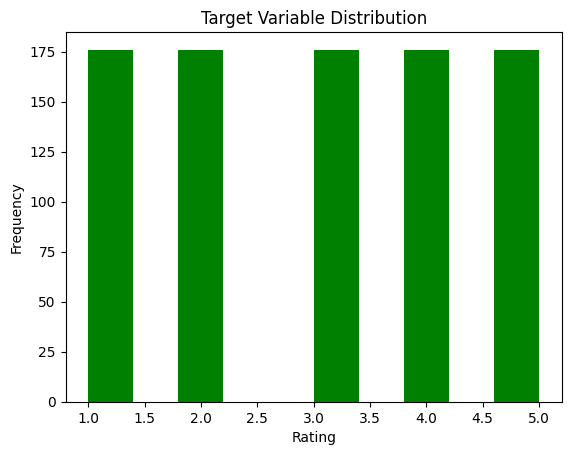

In [13]:
df_res["Rating"].hist(color="Green", grid=False)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Target Variable Distribution")

#### Export Resulting Dataset

In [14]:
df_res.to_csv("data/lifestyle_sustainability_data_standardized_res_smote.csv", index=False)